# Hate Crimes

### This proyect analyzes the evoulution of hate crimes in **Catalunya** throught the years, specially the LGBTIQ+ comunity.

In [ ]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from numpy import number
    

In [576]:
df = pd.read_csv('/Users/enrique/code/EFRdev/00 - Post-Bootcamp/Hate_Crimes/data/Catalunya_Hate_Crimes.csv')
df.head()

,Any,Núm. Mes,Nom Mes,Regió Policial (RP),Àrea Bàsica Policial (ABP),Província,Comarca,Municipi,Tipus de lloc dels fets,Tipus de fet,Tipus de fet (Codi penal) o d’Infracció (altres lleis),Àmbit fet,Rol,Sexe,Edat,Nombre víctimes
0,2021,1.0,gener,RP Metropolitana Barcelona,ABP Ciutat Vella,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,Contra exer. drets fonamentals i llib. públiques,LGTBI-fòbia,Víctima,HOME,28,1.0
1,2021,1.0,gener,RP Metropolitana Barcelona,ABP Ciutat Vella,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,Contra exer. drets fonamentals i llib. públiques,LGTBI-fòbia,Víctima,HOME,27,1.0
2,2021,1.0,gener,RP Metropolitana Barcelona,ABP Ciutat Vella,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,Lesions (lleu),LGTBI-fòbia,Persona autora,DONA,23,1.0
3,2021,1.0,gener,RP Metropolitana Barcelona,ABP Ciutat Vella,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,Lesions (lleu),LGTBI-fòbia,Víctima,HOME,24,1.0
4,2021,1.0,gener,RP Metropolitana Barcelona,ABP Ciutat Vella,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,Lesions (lleu),LGTBI-fòbia,Persona autora,DONA,21,1.0


## Checking if there are any null or nans in the dataset. If there're are we will drop them.

In [577]:
df.isnull().sum()

Any                                                       0
Núm. Mes                                                  1
Nom Mes                                                   0
Regió Policial (RP)                                       0
Àrea Bàsica Policial (ABP)                                0
Província                                                 0
Comarca                                                   0
Municipi                                                  0
Tipus de lloc dels fets                                   0
Tipus de fet                                              0
Tipus de fet (Codi penal) o d’Infracció (altres lleis)    0
Àmbit fet                                                 0
Rol                                                       0
Sexe                                                      0
Edat                                                      0
Nombre víctimes                                           1
dtype: int64

In [578]:
#df.isnull().sum()
df[df['Núm. Mes'].isnull()]
df = df.dropna(subset = ['Núm. Mes', 'Nombre víctimes'])
#df.isnull().sum()

In [579]:
df.shape

(5861, 16)

## We need to turn all numbers into integers: Mes, Edad, Número de Victimas

In [580]:
#Turning all numbers into integres
df = df.astype({'Núm. Mes': int, 'Edat': int, 'Nombre víctimes': int})
df['Núm. Mes'] = df['Núm. Mes'].apply(lambda n: f"{n:02d}")
df.head()

,Any,Núm. Mes,Nom Mes,Regió Policial (RP),Àrea Bàsica Policial (ABP),Província,Comarca,Municipi,Tipus de lloc dels fets,Tipus de fet,Tipus de fet (Codi penal) o d’Infracció (altres lleis),Àmbit fet,Rol,Sexe,Edat,Nombre víctimes
0,2021,01,gener,RP Metropolitana Barcelona,ABP Ciutat Vella,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,Contra exer. drets fonamentals i llib. públiques,LGTBI-fòbia,Víctima,HOME,28,1
1,2021,01,gener,RP Metropolitana Barcelona,ABP Ciutat Vella,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,Contra exer. drets fonamentals i llib. públiques,LGTBI-fòbia,Víctima,HOME,27,1
2,2021,01,gener,RP Metropolitana Barcelona,ABP Ciutat Vella,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,Lesions (lleu),LGTBI-fòbia,Persona autora,DONA,23,1
3,2021,01,gener,RP Metropolitana Barcelona,ABP Ciutat Vella,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,Lesions (lleu),LGTBI-fòbia,Víctima,HOME,24,1
4,2021,01,gener,RP Metropolitana Barcelona,ABP Ciutat Vella,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,Lesions (lleu),LGTBI-fòbia,Persona autora,DONA,21,1


## There are some month numbers that are **wrong**...

In [581]:
repeated = df['Núm. Mes'].unique()
repeated

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '33', '88'], dtype=object)

In [582]:
error_33 = df[df['Núm. Mes'] == "33"]
error_88 = df[df['Núm. Mes'] == "88"]

df = df[df['Núm. Mes'] != "33"]
df = df[df['Núm. Mes'] != "88"]
df.head()

,Any,Núm. Mes,Nom Mes,Regió Policial (RP),Àrea Bàsica Policial (ABP),Província,Comarca,Municipi,Tipus de lloc dels fets,Tipus de fet,Tipus de fet (Codi penal) o d’Infracció (altres lleis),Àmbit fet,Rol,Sexe,Edat,Nombre víctimes
0,2021,01,gener,RP Metropolitana Barcelona,ABP Ciutat Vella,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,Contra exer. drets fonamentals i llib. públiques,LGTBI-fòbia,Víctima,HOME,28,1
1,2021,01,gener,RP Metropolitana Barcelona,ABP Ciutat Vella,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,Contra exer. drets fonamentals i llib. públiques,LGTBI-fòbia,Víctima,HOME,27,1
2,2021,01,gener,RP Metropolitana Barcelona,ABP Ciutat Vella,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,Lesions (lleu),LGTBI-fòbia,Persona autora,DONA,23,1
3,2021,01,gener,RP Metropolitana Barcelona,ABP Ciutat Vella,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,Lesions (lleu),LGTBI-fòbia,Víctima,HOME,24,1
4,2021,01,gener,RP Metropolitana Barcelona,ABP Ciutat Vella,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,Lesions (lleu),LGTBI-fòbia,Persona autora,DONA,21,1


In [583]:
df['Núm. Mes'].unique()


array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

## Merging "Any" & "Núm. Mes" to one column "Date"

In [584]:
df['Date'] = df.apply (lambda row: datetime.strptime(f"{row['Any']}-{row['Núm. Mes']}-01", "%Y-%m-%d"), axis=1)
df = df.drop(columns=['Any', 'Núm. Mes', 'Nom Mes', 'Àrea Bàsica Policial (ABP)', 'Regió Policial (RP)', "Tipus de fet (Codi penal) o d’Infracció (altres lleis)"])
df

,Província,Comarca,Municipi,Tipus de lloc dels fets,Tipus de fet,Àmbit fet,Rol,Sexe,Edat,Nombre víctimes,Date
0,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,LGTBI-fòbia,Víctima,HOME,28,1,2021-01-01
1,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,LGTBI-fòbia,Víctima,HOME,27,1,2021-01-01
2,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,LGTBI-fòbia,Persona autora,DONA,23,1,2021-01-01
3,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,LGTBI-fòbia,Víctima,HOME,24,1,2021-01-01
4,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,LGTBI-fòbia,Persona autora,DONA,21,1,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...
5858,Barcelona,Vallès Occidental,sense espècificar,sense espècificar,DELICTES,Ètnic/origen nacional/origen racial,Víctima,HOME,65,1,2024-10-01
5859,Barcelona,Vallès Occidental,sense espècificar,sense espècificar,DELICTES,Ètnic/origen nacional/origen racial,Víctima,HOME,58,1,2024-09-01
5860,Barcelona,Vallès Occidental,sense espècificar,sense espècificar,DELICTES,Ètnic/origen nacional/origen racial,Víctima,HOME,67,1,2024-09-01
5861,Barcelona,Vallès Occidental,sense espècificar,sense espècificar,DELICTES,Ètnic/origen nacional/origen racial,Autor,HOME,29,1,2024-09-01


In [585]:
df['Date'].dtype

dtype('<M8[ns]')

In [586]:
provincia_virtual = df[df['Província'] == 'Província Virtual']
provincia_virtual
df['Província'].unique()


array(['Barcelona', 'Tarragona', 'Girona', 'Lleida', 'Província Virtual'],
      dtype=object)

In [587]:
df = df[df['Província'] != "Província Virtual"]
df

,Província,Comarca,Municipi,Tipus de lloc dels fets,Tipus de fet,Àmbit fet,Rol,Sexe,Edat,Nombre víctimes,Date
0,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,LGTBI-fòbia,Víctima,HOME,28,1,2021-01-01
1,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,LGTBI-fòbia,Víctima,HOME,27,1,2021-01-01
2,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,LGTBI-fòbia,Persona autora,DONA,23,1,2021-01-01
3,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,LGTBI-fòbia,Víctima,HOME,24,1,2021-01-01
4,Barcelona,Barcelonès,Barcelona,Via Pública urbana,Delicte,LGTBI-fòbia,Persona autora,DONA,21,1,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...
5858,Barcelona,Vallès Occidental,sense espècificar,sense espècificar,DELICTES,Ètnic/origen nacional/origen racial,Víctima,HOME,65,1,2024-10-01
5859,Barcelona,Vallès Occidental,sense espècificar,sense espècificar,DELICTES,Ètnic/origen nacional/origen racial,Víctima,HOME,58,1,2024-09-01
5860,Barcelona,Vallès Occidental,sense espècificar,sense espècificar,DELICTES,Ètnic/origen nacional/origen racial,Víctima,HOME,67,1,2024-09-01
5861,Barcelona,Vallès Occidental,sense espècificar,sense espècificar,DELICTES,Ètnic/origen nacional/origen racial,Autor,HOME,29,1,2024-09-01


# Cleaning text

In [588]:
import string
import unicodedata
import re

def cleaning_text(text):
    if not isinstance(text, str):
        return ""
    text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8')
    text = text.lower()
    text = text.replace("municipi de ", "")
    text = text.replace("resta municipis abp ", "")
    text = text.replace("abp ", "")
    text = text.replace("l'", "")
    text = text.replace("-", " ")
    text = text.replace("'", "")
    text = " ".join(text.split())  # elimina espacios extras
    return text

In [589]:
#df.loc[:,'Tipus de fet'] = df['Tipus de fet'].apply(cleaning_text)
for col in df.select_dtypes(include='object').columns:df.loc[:, col] = df[col].apply(cleaning_text)

df.head()

,Província,Comarca,Municipi,Tipus de lloc dels fets,Tipus de fet,Àmbit fet,Rol,Sexe,Edat,Nombre víctimes,Date
0,barcelona,barcelones,barcelona,via publica urbana,delicte,lgtbi fobia,victima,home,28,1,2021-01-01
1,barcelona,barcelones,barcelona,via publica urbana,delicte,lgtbi fobia,victima,home,27,1,2021-01-01
2,barcelona,barcelones,barcelona,via publica urbana,delicte,lgtbi fobia,persona autora,dona,23,1,2021-01-01
3,barcelona,barcelones,barcelona,via publica urbana,delicte,lgtbi fobia,victima,home,24,1,2021-01-01
4,barcelona,barcelones,barcelona,via publica urbana,delicte,lgtbi fobia,persona autora,dona,21,1,2021-01-01


In [590]:
df.loc[:, 'Tipus de fet'] = df['Tipus de fet'].replace('infraccions administratives', 'infraccio administrativa')
df.loc [:,'Tipus de fet'] = df['Tipus de fet'].replace('delictes', 'delicte')
df['Tipus de fet'].unique()

array(['delicte', 'altres', 'infraccio administrativa',
       'faltes administratives', 'int. i/o xarxes', 'lleis especials'],
      dtype=object)

### There are some missnames and errors in **Municipi** and **Comarca**. 
We need to fix and make sure they are accurate with the real names. 

In [591]:
df['Municipi'].unique()

array(['barcelona', 'manresa', 'cabrils', 'premia de mar',
       'mollet del valles', 'girona', 'bages', 'hospitalet de llobregat',
       'sant adria de besos', 'tarragona', 'igualada', 'calders', 'celra',
       'sant vicenc dels horts', 'reus', 'fornells de la selva',
       'terrassa', 'palafrugell', 'santa coloma de gramenet', 'vic',
       'valls', 'sant just desvern', 'rp metropolitana barcelona',
       'castellbell i el vilar', 'sabadell', 'sant joan de vilatorrada',
       'badalona', 'rubi', 'berga', 'baix emporda la bisbal', 'mont ras',
       'mataro', 'lleida', 'tarragones', 'torredembarra',
       'baix camp priorat', 'sense especificar',
       'sant feliu de llobregat', 'sant andreu de la barca',
       'lloret de mar', 'malgrat de mar', 'arenys de mar',
       'selva interior', 'caldes de malavella',
       'els hostalets de pierola', 'salou', 'granollers', 'cardedeu',
       'la bisbal demporda', 'sitges', 'sant feliu de guixols',
       'vilanova i la geltru', 'bla

In [592]:
import re

# Función para normalizar espacios múltiples a uno solo y limpiar espacios al inicio/final
def normalize_spaces(text):
    if not isinstance(text, str):
        return ''
    return re.sub(r'\s+', ' ', text.strip().lower())

# Diccionario para reemplazar combos comarca+municipio por solo municipio, con keys normalizadas
reemplazos_raw = {
    'baix emporda   la bisbal': 'la bisbal demporda',
    'baix camp   priorat': 'reus',
    'selva interior': 'santa coloma de farners',
    'vall daran   alta ribagorca': 'vielha e mijaran',
    'segarra   urgell': 'tarrega',
    'segria   garrigues   pla durgell': 'cervera',
    'baix emporda   sant feliu': 'sant feliu de guixols',
    'girones   pla de estany': 'girona',
    'alt emporda   roses': 'roses',
    'bages': 'manresa',
    'tarragones': 'tarragona',
    'anoia': 'igualada',
    'garraf': 'vilanova i la geltru',
    'osona': 'vic',
    'solsones': 'solsona',
    'bergueda': 'berga',
    'cerdanyola': 'cerdanyola del valles',
    'calonge' : 'calonge i sant antoni',
    'castell platja daro': 'castell daro',
    'platja daro': 'platja daro i sagaro',
    'montcada' : 'montcada i reixac'

}

# Normalizamos las keys del diccionario
reemplazos = {normalize_spaces(k): v for k, v in reemplazos_raw.items()}

def cleaning_text(text):
    # Aquí asumo que tu función original hace más limpieza, ejemplo básico:
    if not isinstance(text, str):
        return ''
    return normalize_spaces(text)

def cleaning_municipios(text_series):
    municipios_limpios = []
    for m in text_series:
        m_clean = cleaning_text(m)

        # Reemplazar segun diccionario
        m_clean = reemplazos.get(m_clean, m_clean)

        # Cambiar 'sense especificar' a 'resta municipis'
        if m_clean == 'sense especificar' or m_clean == '':
            m_clean = 'resta municipis'

        # Mantener tal cual 'resta municipis' y 'rp metropolitana barcelona'
        if m_clean in ['resta municipis', 'rp metropolitana barcelona']:
            municipios_limpios.append(m_clean)
            continue

        # Solo añadir si no vacío
        if m_clean:
            municipios_limpios.append(m_clean)

    return sorted(set(municipios_limpios))

# Aplicar la limpieza y crear nueva columna limpia en el DataFrame
df['Municipi_clean'] = df['Municipi'].apply(
    lambda x: (
        reemplazos.get(cleaning_text(x), cleaning_text(x))
        if cleaning_text(x) not in ['', 'sense especificar']
        else 'resta municipis'
    )
)

# Ejemplo de obtener los municipios únicos limpios
municipios_validos = cleaning_municipios(df['Municipi'])
print(municipios_validos)

['abrera', 'aiguaviva', 'albatarrec', 'alella', 'anglesola', 'arenys de mar', 'argentona', 'artes', 'badalona', 'badia del valles', 'baix ebre', 'banyoles', 'barcelona', 'bell lloc durgell', 'bellpuig', 'benavent de segria', 'berga', 'bescano', 'blanes', 'bordils', 'cabrils', 'cadaques', 'calafell', 'calders', 'caldes de malavella', 'caldes de montbui', 'calella', 'calonge i sant antoni', 'camarles', 'cambrils', 'canet de mar', 'canovelles', 'canyelles', 'capellades', 'cardedeu', 'castell daro', 'castellar del valles', 'castellbell i el vilar', 'castelldefels', 'castello dempuries', 'castellvi de rosanes', 'celra', 'cerdanyola del valles', 'cervera', 'cornella de llobregat', 'cubelles', 'el bruc', 'el port de la selva', 'el prat de llobregat', 'el vendrell', 'els hostalets de pierola', 'esparreguera', 'esplugues de llobregat', 'esquirol', 'figueres', 'fornells de la selva', 'gava', 'girona', 'granollers', 'gurb', 'hospitalet de llobregat', 'igualada', 'jorba', 'juneda', 'la bisbal demp

/var/folders/52/7ccrs33x6bl334rw1cb76c0h0000gn/T/ipykernel_74210/1763050107.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Municipi_clean'] = df['Municipi'].apply(


In [593]:
df['Municipi_clean'].unique()

array(['barcelona', 'manresa', 'cabrils', 'premia de mar',
       'mollet del valles', 'girona', 'hospitalet de llobregat',
       'sant adria de besos', 'tarragona', 'igualada', 'calders', 'celra',
       'sant vicenc dels horts', 'reus', 'fornells de la selva',
       'terrassa', 'palafrugell', 'santa coloma de gramenet', 'vic',
       'valls', 'sant just desvern', 'rp metropolitana barcelona',
       'castellbell i el vilar', 'sabadell', 'sant joan de vilatorrada',
       'badalona', 'rubi', 'berga', 'la bisbal demporda', 'mont ras',
       'mataro', 'lleida', 'torredembarra', 'resta municipis',
       'sant feliu de llobregat', 'sant andreu de la barca',
       'lloret de mar', 'malgrat de mar', 'arenys de mar',
       'santa coloma de farners', 'caldes de malavella',
       'els hostalets de pierola', 'salou', 'granollers', 'cardedeu',
       'sitges', 'sant feliu de guixols', 'vilanova i la geltru',
       'blanes', 'sant cugat del valles', 'caldes de montbui',
       'vilanova d

In [594]:
#df.loc [:,'Comarca'] = df['Comarca'].replace('el maresme', 'maresme')
df['Comarca'].unique()

array(['barcelones', 'bages', 'maresme', 'valles oriental',
       'valles occidental', 'tarragones', 'anoia', 'moianes', 'girones',
       'baix llobregat', 'baix camp', 'baix emporda', 'osona', 'alt camp',
       'bergueda', 'segria', 'priorat', 'selva', 'garraf',
       'pla de estany', 'val daran', 'urgell', 'alt emporda',
       'alt penedes', 'baix penedes', 'pla durgell', 'solsones',
       'baix ebre', 'ripolles', 'garrotxa', 'montsia', 'garrigues', 'vic',
       'el maresme', 'alt urgell', 'alta ribagorca', 'noguera',
       'terra alta', 'cerdanya', 'pallars jussa', 'conca de barbera',
       'segarra', 'ribera debre'], dtype=object)

In [595]:
df['Comarca_clean'] = df['Comarca'].replace({
    "el maresme": "maresme",
    "vic": "osona",
    "pla de estany": "pla de lestany",
})
df['Comarca_clean'].unique()

/var/folders/52/7ccrs33x6bl334rw1cb76c0h0000gn/T/ipykernel_74210/2420835766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Comarca_clean'] = df['Comarca'].replace({


array(['barcelones', 'bages', 'maresme', 'valles oriental',
       'valles occidental', 'tarragones', 'anoia', 'moianes', 'girones',
       'baix llobregat', 'baix camp', 'baix emporda', 'osona', 'alt camp',
       'bergueda', 'segria', 'priorat', 'selva', 'garraf',
       'pla de lestany', 'val daran', 'urgell', 'alt emporda',
       'alt penedes', 'baix penedes', 'pla durgell', 'solsones',
       'baix ebre', 'ripolles', 'garrotxa', 'montsia', 'garrigues',
       'alt urgell', 'alta ribagorca', 'noguera', 'terra alta',
       'cerdanya', 'pallars jussa', 'conca de barbera', 'segarra',
       'ribera debre'], dtype=object)

## Now we are cleaning the **Rol** column

In [596]:
df['Rol'].unique()
df.loc [:,'Rol'] = df['Rol'].replace('persona autora', 'autor')
df['Rol'].unique()

array(['victima', 'autor'], dtype=object)

In [597]:
# Primero separar: Rol: victima / autor
df = pd.get_dummies(df, columns=['Rol'])

In [598]:
df.head(1)

,Província,Comarca,Municipi,Tipus de lloc dels fets,Tipus de fet,Àmbit fet,Sexe,Edat,Nombre víctimes,Date,Municipi_clean,Comarca_clean,Rol_autor,Rol_victima
0,barcelona,barcelones,barcelona,via publica urbana,delicte,lgtbi fobia,home,28,1,2021-01-01,barcelona,barcelones,False,True


In [599]:
df_final = df.drop(columns=['Comarca',	'Municipi',	'Tipus de lloc dels fets'])
df_final.head(1)


,Província,Tipus de fet,Àmbit fet,Sexe,Edat,Nombre víctimes,Date,Municipi_clean,Comarca_clean,Rol_autor,Rol_victima
0,barcelona,delicte,lgtbi fobia,home,28,1,2021-01-01,barcelona,barcelones,False,True


# Export Final Dataframe as "df_clean_hatecrimes_catalunya"

In [612]:
df_final.to_pickle("df_clean_hatecrimes_catalunya.pkl")
df_final.to_csv('df_clean_hatecrimes_catalunya.csv', index=False, encoding='utf-8')

# Visualizacion: Delitos de Odio en Cataluña

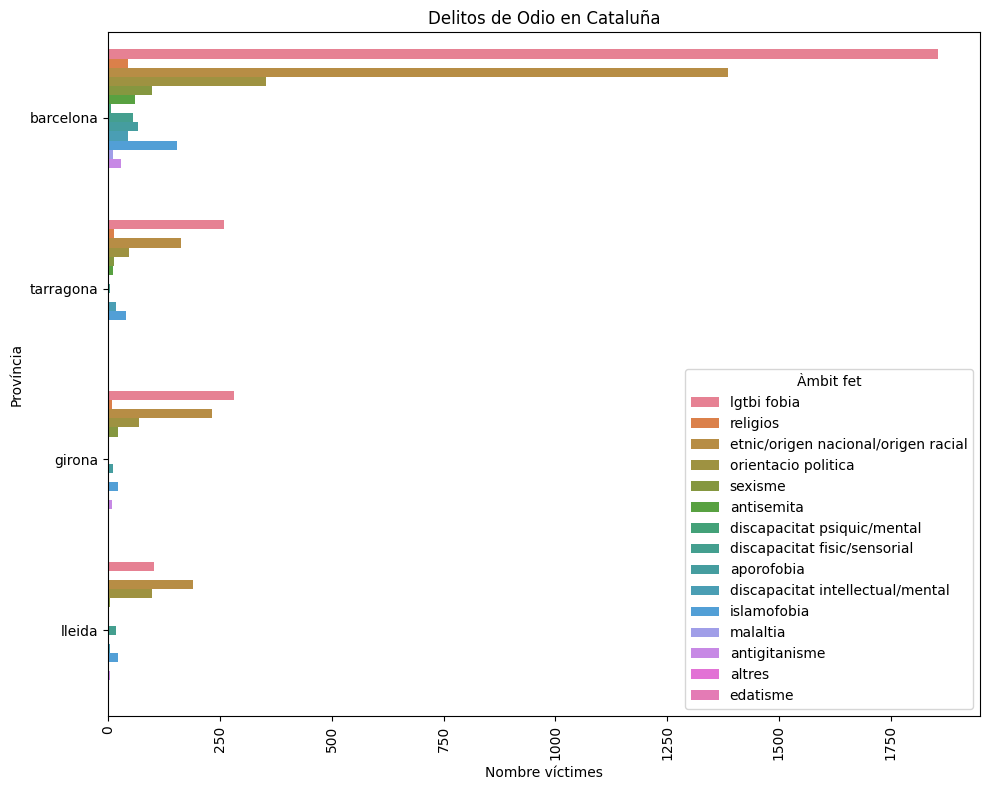

In [601]:
plt.figure(figsize=(10,8))

sns.barplot(df_final, x='Nombre víctimes', y='Província', hue ='Àmbit fet', estimator=sum)
plt.xticks(rotation =90)
plt.title('Delitos de Odio en Cataluña')
plt.tight_layout()
plt.show()

# Visualizaciones

- Vizualización de tipos de delitos

In [602]:
df_final['Àmbit fet'].unique()

array(['lgtbi fobia', 'religios', 'etnic/origen nacional/origen racial',
       'orientacio politica', 'sexisme', 'antisemita',
       'discapacitat psiquic/mental', 'discapacitat fisic/sensorial',
       'aporofobia', 'discapacitat intellectual/mental', 'islamofobia',
       'malaltia', 'antigitanisme', 'altres', 'edatisme'], dtype=object)

In [2]:
Ambit_fet_top3 = ['lgtbi fobia', 'etnic/origen nacional/origen racial', 'sexisme']
df_filtered_delitos = df_final[df_final['Àmbit fet'].isin(Ambit_fet_top3)].copy()
df_filtered_delitos.head()

NameError: name 'df_final' is not defined

In [604]:
# Agrupar por Numero de Victimas
df_victimas = df_filtered_delitos[df_filtered_delitos['Rol_victima'] == True]
df_group_by_victimes = df_victimas.groupby(['Date','Província', 'Comarca_clean', 'Municipi_clean', 'Tipus de fet', 'Àmbit fet', 'Sexe']) ['Nombre víctimes'].sum().reset_index()
df_group_by_victimes

,Date,Província,Comarca_clean,Municipi_clean,Tipus de fet,Àmbit fet,Sexe,Nombre víctimes
0,2021-01-01,barcelona,barcelones,barcelona,delicte,etnic/origen nacional/origen racial,dona,1
1,2021-01-01,barcelona,barcelones,barcelona,delicte,etnic/origen nacional/origen racial,home,2
2,2021-01-01,barcelona,barcelones,barcelona,delicte,lgtbi fobia,dona,2
3,2021-01-01,barcelona,barcelones,barcelona,delicte,lgtbi fobia,home,5
4,2021-01-01,barcelona,barcelones,barcelona,delicte,sexisme,dona,1
...,...,...,...,...,...,...,...,...
1489,2024-12-01,lleida,pla durgell,resta municipis,delicte,etnic/origen nacional/origen racial,home,1
1490,2024-12-01,lleida,segria,resta municipis,delicte,etnic/origen nacional/origen racial,home,3
1491,2024-12-01,lleida,urgell,resta municipis,delicte,etnic/origen nacional/origen racial,dona,1
1492,2024-12-01,tarragona,baix ebre,resta municipis,delicte,lgtbi fobia,home,2


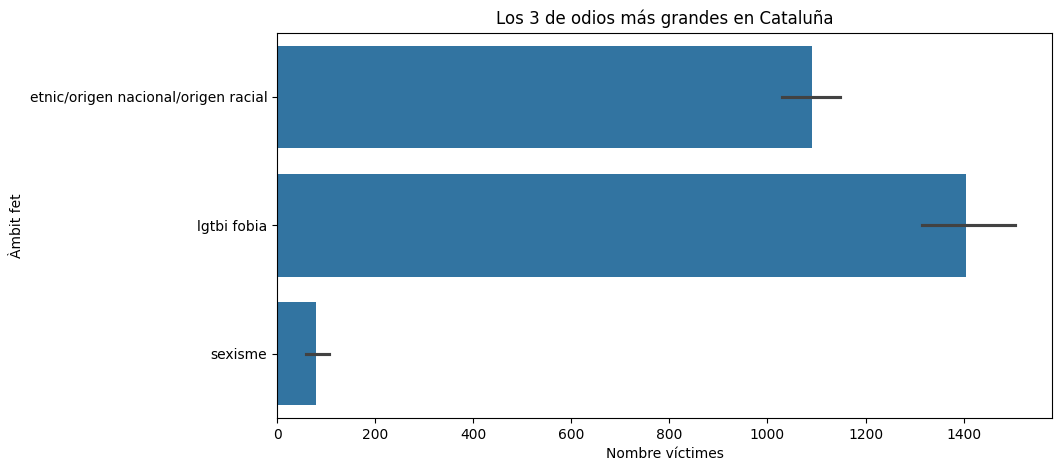

In [605]:
#Vizualización de tipos de odios

plt.figure(figsize=(10, 5))
sns.barplot(df_group_by_victimes, x='Nombre víctimes', y='Àmbit fet' , estimator=sum)
plt.title('Los 3 de odios más grandes en Cataluña')
plt.show()


In [606]:
# Agrupar por Municipios
df_group_by_Municipi = df_filtered_delitos.groupby(['Date','Província', 'Comarca_clean', 'Nombre víctimes', 'Tipus de fet', 'Àmbit fet', 'Rol_victima', 'Sexe']) ['Municipi_clean'].sum().reset_index()
df_group_by_Municipi

,Date,Província,Comarca_clean,Nombre víctimes,Tipus de fet,Àmbit fet,Rol_victima,Sexe,Municipi_clean
0,2021-01-01,barcelona,barcelones,1,altres,lgtbi fobia,True,home,sant adria de besos
1,2021-01-01,barcelona,barcelones,1,delicte,etnic/origen nacional/origen racial,False,dona,barcelona
2,2021-01-01,barcelona,barcelones,1,delicte,etnic/origen nacional/origen racial,False,home,barcelona
3,2021-01-01,barcelona,barcelones,1,delicte,etnic/origen nacional/origen racial,True,dona,barcelona
4,2021-01-01,barcelona,barcelones,1,delicte,etnic/origen nacional/origen racial,True,home,barcelonabarcelona
...,...,...,...,...,...,...,...,...,...
2468,2024-12-01,lleida,urgell,1,delicte,etnic/origen nacional/origen racial,True,dona,resta municipis
2469,2024-12-01,tarragona,baix ebre,1,delicte,lgtbi fobia,False,home,resta municipis
2470,2024-12-01,tarragona,baix ebre,1,delicte,lgtbi fobia,True,home,resta municipisresta municipis
2471,2024-12-01,tarragona,tarragones,1,delicte,lgtbi fobia,False,dona,resta municipis


In [607]:
df_group_by_Date = df_filtered_delitos.groupby(['Municipi_clean','Província', 'Comarca_clean', 'Nombre víctimes', 'Tipus de fet', 'Àmbit fet', 'Rol_victima', 'Sexe']) ['Date'].min().reset_index()
df_group_by_Date

,Municipi_clean,Província,Comarca_clean,Nombre víctimes,Tipus de fet,Àmbit fet,Rol_victima,Sexe,Date
0,abrera,barcelona,baix llobregat,1,delicte,lgtbi fobia,True,dona,2021-06-01
1,alella,barcelona,maresme,1,delicte,lgtbi fobia,True,dona,2021-12-01
2,arenys de mar,barcelona,maresme,1,delicte,etnic/origen nacional/origen racial,False,home,2021-03-01
3,arenys de mar,barcelona,maresme,1,delicte,etnic/origen nacional/origen racial,True,dona,2021-05-01
4,arenys de mar,barcelona,maresme,1,delicte,lgtbi fobia,False,dona,2021-10-01
...,...,...,...,...,...,...,...,...,...
933,vilanova i la geltru,barcelona,garraf,1,delicte,lgtbi fobia,True,home,2021-06-01
934,vilassar de mar,barcelona,maresme,1,delicte,etnic/origen nacional/origen racial,True,dona,2022-08-01
935,vilassar de mar,barcelona,maresme,1,delicte,etnic/origen nacional/origen racial,True,home,2022-08-01
936,vilassar de mar,barcelona,maresme,1,delicte,lgtbi fobia,False,home,2022-01-01


In [608]:
df_LGBTI = df_filtered_delitos[df_filtered_delitos["Àmbit fet"] == "lgtbi fobia"]
df_group_by_LGBTI = df_LGBTI.groupby('Date')['Nombre víctimes'].sum().reset_index()

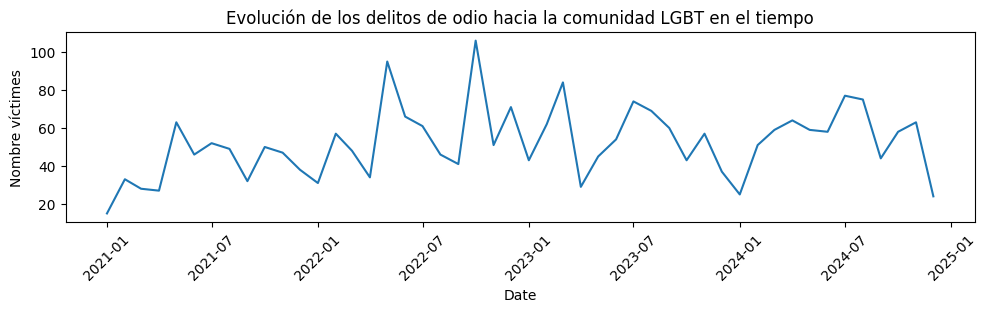

In [609]:
#Evolucion de la discriminación LGBT en el tiempo

plt.figure(figsize=(10,3))
sns.lineplot(data=df_group_by_LGBTI, x='Date', y="Nombre víctimes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Evolución de los delitos de odio hacia la comunidad LGBT en el tiempo')
plt.show()


## Agrupación de delitos (top 3) por Provincia, Comarca y Municipio

In [610]:
df_hate_crimes = df_filtered_delitos.groupby(['Date','Província', 'Comarca_clean', 'Municipi_clean', 'Àmbit fet'])['Nombre víctimes'].sum().reset_index()
df_hate_crimes

,Date,Província,Comarca_clean,Municipi_clean,Àmbit fet,Nombre víctimes
0,2021-01-01,barcelona,barcelones,barcelona,etnic/origen nacional/origen racial,5
1,2021-01-01,barcelona,barcelones,barcelona,lgtbi fobia,14
2,2021-01-01,barcelona,barcelones,barcelona,sexisme,2
3,2021-01-01,barcelona,barcelones,sant adria de besos,lgtbi fobia,1
4,2021-01-01,barcelona,maresme,cabrils,etnic/origen nacional/origen racial,2
...,...,...,...,...,...,...
1222,2024-12-01,lleida,pla durgell,resta municipis,etnic/origen nacional/origen racial,2
1223,2024-12-01,lleida,segria,resta municipis,etnic/origen nacional/origen racial,3
1224,2024-12-01,lleida,urgell,resta municipis,etnic/origen nacional/origen racial,2
1225,2024-12-01,tarragona,baix ebre,resta municipis,lgtbi fobia,3


## Agrupación de delitos LGBTI por Comarcas

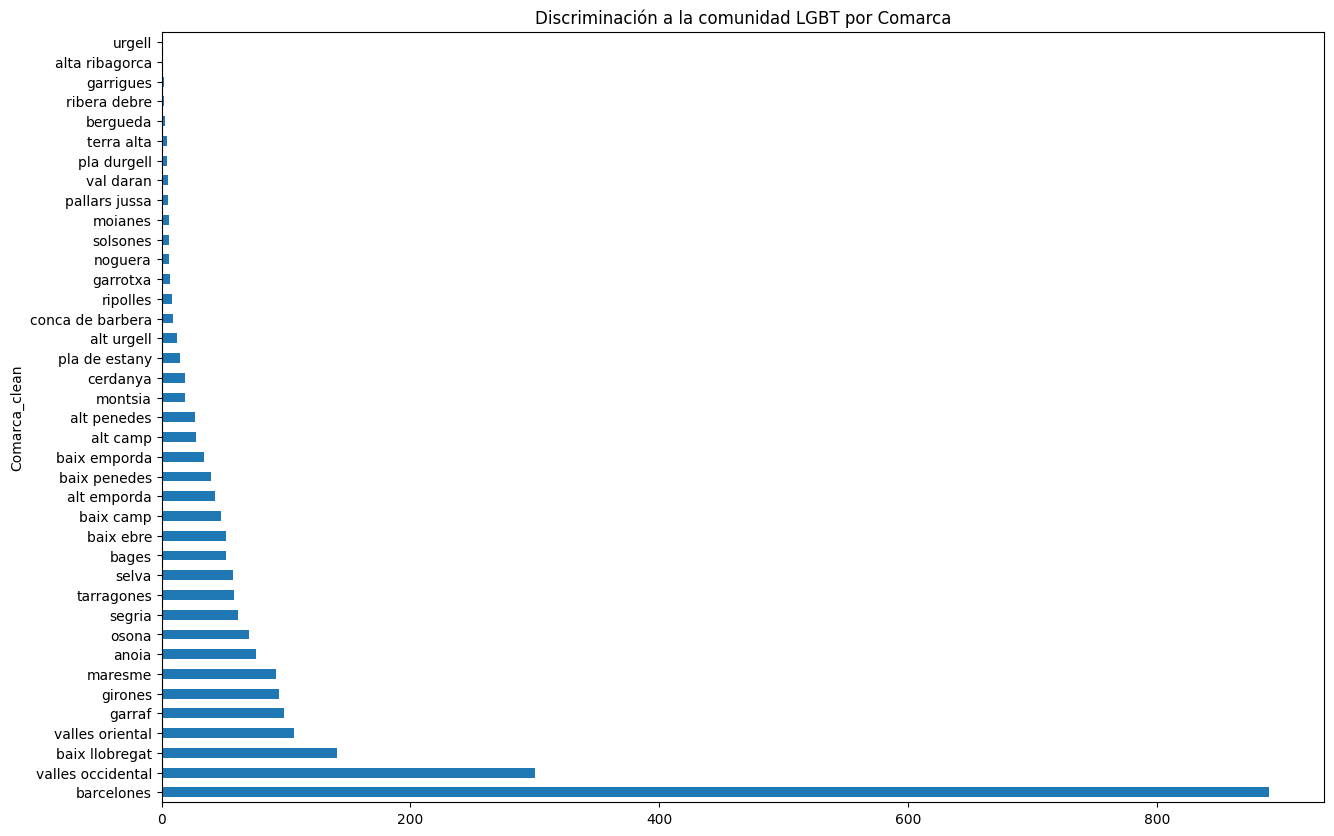

In [238]:
# Discriminación LGBT por comarca

df_LGBTI = df_filtered_delitos[df_filtered_delitos["Àmbit fet"] == "lgtbi fobia"]
df_group_LGBTI = df_LGBTI.groupby(['Província', 'Comarca_clean', 'Municipi_clean'])['Nombre víctimes'].sum().reset_index()

"""
pivot = df_group_LGBTI.pivot_table(index='Comarca_clean', columns='Municipi_clean', values= 'Nombre víctimes', fill_value=0)

plt.figure(figsize = (15,10))
sns.heatmap(pivot , cmap='Reds')
plt.title('Delitos de odio LGBT por provincia, comarca y municipio')
"""

comarca_counts = df_group_LGBTI.groupby('Comarca_clean')['Nombre víctimes'].sum().sort_values(ascending=False)
plt.figure(figsize = (15,10))
plt.title('Discriminación a la comunidad LGBT por Comarca')
comarca_counts.plot(kind='barh')
plt.show()
